# 0 Jensen's Notes for PartIA Computing Michaelmas

# Course Content


0. [Introduction](00%20Part%20IA%20Michaelmas%20Term%20computing.ipynb)
1. [Variables, assignment and operator precedence](01%20Variables,%20assignment%20and%20operator%20precedence.ipynb)
1. [Control statements](02%20Control%20statements.ipynb)
1. [Types, type conversions and floating point arithmetic](03%20Types,%20type%20conversions%20and%20floating%20point%20arithmetic.ipynb)
1. [Functions](04%20Functions.ipynb)
1. [Library functions](05%20Library%20functions.ipynb)
1. [Data structures](06%20Data%20structures.ipynb)
1. [Numerical computation](07%20Numerical%20computation.ipynb)
1. [Plotting](08%20Plotting.ipynb)
1. [Error handling and testing](09%20Error%20handling%20and%20testing.ipynb)
1. [Algorithms](10%20Algorithms.ipynb)
1. [Complexity](11%20Complexity.ipynb)
1. [Object-oriented design](12%20Object-oriented%20design.ipynb)

# 01 Variables, assignment and operator precedence

Objectives:
- Introduce expressions and basic operators
- Introduce operator precedence
- Understand variables and assignment

### Operations

In [2]:
print(2 ** 8)
print(11 % 3)
print(11 // 3)

256
2
3


### Shortcuts

In [3]:
a = 12
a *= 4
print(a)

48


### $\LaTeX$ Symbols
LaTeX Commands within code: <br>
Type `'\theta'` followed by `tab` key

In [4]:
α = 10
β = 20
γ = α + β
print(γ)

30


# 02 Control statements

Objectives:
- Introduce Boolean types
- Introduce comparison operators
- Learn to use control statements

### Boolean Operators

In [5]:
print(10 < 9 or not 15 < 20 or 10 != 10)

False


### `if`

In [6]:
x = -10.0

if x > 0.0:  
    print('Initial x is greater than zero')
elif x < 0.0:  
    print('Initial x is less than zero')
else: 
    print('Initial x is not less than zero and not greater than zero, therefore it must be zero')

Initial x is less than zero


### `for`

In [7]:
for n in range(4):
    print(n, n**2)
print("----")
for n in range(0, 10, 3):
    print(n)

0 0
1 1
2 4
3 9
----
0
3
6
9


### `while`

In [8]:
x = -2
while x < 5:
    print(x)
    x += 1  # Increment x

-2
-1
0
1
2
3
4


### `break`

In [9]:
for x in range(10):
    print(x)
    if x == 5:
        print("Time to break out")
        break

0
1
2
3
4
5
Time to break out


### `continue`

In [10]:
for j in range(20):
    if j % 4 != 0:  # Check remained of j/4
        continue  # jump to next iteration over j
    print("Number is divisible by 4:", j)

Number is divisible by 4: 0
Number is divisible by 4: 4
Number is divisible by 4: 8
Number is divisible by 4: 12
Number is divisible by 4: 16


### `pass`

In [11]:
for x in range(10):
    if x < 5:
        # TODO: implement handling of x < 5 when other cases finished (fake TODO btw)
        pass
    elif x < 9:
        print(x*x)
    else:
        print(x)

25
36
49
64
9


# 03 Types, type conversions and floating point arithmetic

Objectives
- Introduce primitive data types (booleans, strings and numerical types)
- Type inspection
- Basic type conversion
- Introduction to pitfalls of floating point arithmetic 

### Types

In [12]:
print(type(True))
print(type(0.50 + 2j))
print(type("This is a string"))

<class 'bool'>
<class 'complex'>
<class 'str'>


In [13]:
b = 4-3J
print(b.imag, b.real, b.conjugate(), abs(b))

-3.0 4.0 (4+3j) 5.0


### Integer Overflow
Gangnam style: $2^{31}$ views, YouTube switched from 32-bit to 64-bit integers to count views.<br>
Boeing 787 Dreamliner: electricity shuts down if plane powered 248 days continuously ($2^{31} \times 0.01$ seconds)

In [14]:
a = 8
print(a.bit_length())
b = a**12
print(b.bit_length()) #This would exceed 32 bits

4
37


### Floating point storage
$$
10.45 = \underbrace{+}_{\text{sign}} \underbrace{1045}_{\text{significand}} \times \underbrace{10^{-2}}_{\text{exponent} = -2}
$$

In [15]:
x = 0.1
print('x in 30 characters: ')
print('{0:.30f}'.format(x))
for i in range(20):
    x = x*11 - 1
    print(x)
# This is caused by the fact that 0.1 here is represented by a 64 bit binary approximation.
# By default, Python uses 64 bits to store a float, but we can use numpy to create 32 bit floats and more.

x in 30 characters: 
0.100000000000000005551115123126
0.10000000000000009
0.10000000000000098
0.10000000000001075
0.10000000000011822
0.10000000000130038
0.1000000000143042
0.10000000015734622
0.10000000173080847
0.10000001903889322
0.10000020942782539
0.10000230370607932
0.10002534076687253
0.10027874843559781
0.1030662327915759
0.13372856070733485
0.4710141677806834
4.181155845587517
44.992714301462684
493.9198573160895
5432.118430476985


Patriot Missle Failure: missle software multiplied counter by float representation of $0.1$ in 24 bits, and it lead to an error of $0.32\,$s  after 100 hours of operation, and due to the high velocity of the missile it failed to intercept the incoming Scud.

In [95]:
import numpy as np
# Compute internal system counter after 100 hours (counter increments every 1/10 s)
num_hours = 100
num_seconds = num_hours*60*60
system_counter = num_seconds*10  # system clock counter

# Test with 16 bit float
dt = np.float16(0.1)
time = dt*system_counter
print("Time error after 100 hours using 16 bit float (s):", abs(time - num_seconds))

# Test with 32 bit float
dt = np.float32(0.1)
time = dt*system_counter
print("Time error after 100 hours using 32 bit float (s):", abs(time - num_seconds))

# Test with 64 bit float
dt = np.float64(0.1)
time = dt*system_counter
print("Time error after 100 hours using 64 bit float (s):", abs(time - num_seconds))
print("\n(in 100 sig figs: {:.100f})".format(time - num_seconds)) # idk why the error is zero though
print("The type of dt is not a normal float; it is: {}".format(type(dt)))

Time error after 100 hours using 16 bit float (s): 87.890625
Time error after 100 hours using 32 bit float (s): 0.005364418029785156
Time error after 100 hours using 64 bit float (s): 0.0

(in 100 sig figs: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000)
The type of dt is not a normal float; it is: <class 'numpy.float64'>


# 04 Functions

Objectives:
- Introduce construction and use of user functions
- Returning from functions
- Default arguments
- Recursion

### Named arguments

In [17]:
def subtract_and_increment(a, b):
    "Return a minus b, plus 1"
    return a - b + 1
alpha, beta = 3, 5
print(subtract_and_increment(a=alpha, b=beta))  # Expect -1
print(subtract_and_increment(b=beta, a=alpha))  # Expect -1

-1
-1


### Passing a function as a function argument

In [18]:
def f_minus_10(x):
    return x-10
def is_positive(f, x):
    "Check if the function value f(x) is positive"
    # Evaluate the function passed into the function for the value of x 
    # passed into the function
    if f(x) > 0:
        return True, f(x)
    else:
        return False, f(x)
print(is_positive(f_minus_10, 8))

(False, -2)


### Recursive Functions

In [19]:
def f(n): 
    "Compute the nth Fibonacci number using recursion"
    if n == 0:
        return 0  # This doesn't call f, so it breaks out of the recursion loop
    elif n == 1:
        return 1  # This doesn't call f, so it breaks out of the recursion loop
    else:
        return f(n - 1) + f(n - 2)  # This calls f for n-1 and n-2 (recursion), and returns the sum 

print(f(10))

55


In [96]:
"My recursive function to compute a root"

def testf(x): # Test function with obvious roots 4 and -4
    return x**2 - 16
def my_f(x): # Function to be used
    "Evaluate polynomial function"
    return x**3 - 6*x**2 + 4*x + 12

def compute_root(f, x0, x1, tol, max_it, it_count=0): # it_count initialized in the argument part of the def
    "Compute roots of a function using bisection, recusive function"
    
    # increment it_count
    it_count += 1
    
    # bisection and reassigning boundary values
    x_mid = (x0 + x1)/2
    if f(x_mid)*f(x0) < 0:
        x1 = x_mid
    else:
        x0 = x_mid
    
    # Break if error is under tolerance
    error = abs(f(x_mid))
    if error < tol:
        return x_mid, f(x_mid), it_count
    
    # Break if number of iterations exceed maximum
    if it_count >= max_it:
        print("Maximum Iterations Reached - will show results with ", it_count, " iterations.")
        return x_mid, f(x_mid), it_count
    
    # Call compute_root recursively
    return compute_root(f, x0, x1, tol, max_it, it_count)

# Testing my code with the testf (root is 4 and -4) and my_f
x, f, num_it = compute_root(testf, x0=3, x1=6, tol=1.0e-6, max_it=1000)
print(x, f, num_it)
x, f, num_it = compute_root(my_f, x0=3, x1=6, tol=1.0e-6, max_it=1000)
print(x, f, num_it)
print( round(x - 4.534070134162903, 10) == 0.0)

4.0000001192092896 9.536743306171047e-07 23
4.534070134162903 -7.047073751209609e-07 23
True


# 05 Library functions

Objectives:
- Introduce use of standard library functions
- Importing and using modules
- Introduction to namespaces
- Print formatting of floats

In [21]:
import math

x = 2.0
x = math.sqrt(x)
print(x)

1.4142135623730951


In [22]:
from math import sqrt as square_root

x = 2.0
x = square_root(x)
print(x)

1.4142135623730951


### String Formatting

In [23]:
import math
print("{}".format(math.pi))
print("{:.8}".format(math.pi))
print("{:.20e}".format(math.pi))

3.141592653589793
3.1415927
3.14159265358979311600e+00


A very nice compression exercise: [05 Exercises](http://localhost:8888/notebooks/Documents/GitHub/PartIA-Computing-Michaelmas/Exercises/05%20Exercises.ipynb)

Failed - [Sorting Example]("05%20Library%20functions.ipynb")

# 06 Data structures

Objectives:
- Use `list`, `tuple` and dictionary (`dict`) data structures
- Use iteratation to visit entries in a data structure 
- Learn to select the right data structure for an application

### Lists

In [24]:
lab_group0 = ["Sarah", "John", "Joe", "Emily"]
lab_group1 = ["Roger", "Rachel", "Amer", "Caroline", "Colin"]
print([lab_group0, lab_group1])
print(lab_group0 + lab_group1)

[['Sarah', 'John', 'Joe', 'Emily'], ['Roger', 'Rachel', 'Amer', 'Caroline', 'Colin']]
['Sarah', 'John', 'Joe', 'Emily', 'Roger', 'Rachel', 'Amer', 'Caroline', 'Colin']


In [25]:
lab_group0 = ["Sarah", "John", "Joe", "Emily"]
for member in lab_group0:
    print(member)
print("----")
for n, member in enumerate(lab_group0):
    print(n, member)

Sarah
John
Joe
Emily
----
0 Sarah
1 John
2 Joe
3 Emily


In [26]:
lab_group0 = ["Sarah", "John", "Joe", "Emily"]

# Remove the second student (indexing starts from 0, so 1 is the second element)
lab_group0.pop(1)
print(lab_group0)

# Add new student "Josephine" at the end of the list
lab_group0.append("Josephine")
print(lab_group0)

['Sarah', 'Joe', 'Emily']
['Sarah', 'Joe', 'Emily', 'Josephine']


In [27]:
lab_group0 = ["Sarah", "John", "Joe", "Emily"]
for i in range(len(lab_group0)):
    print(lab_group0[i])

Sarah
John
Joe
Emily


In [28]:
lab_group0 = ["Sarah", "John", "Joe", "Emily"]
lab_group0.sort()
print(lab_group0)

print("----")

lab_group0 = ["Sarah", "John", "Joe", "Emily"]
sorted_lab_group0 = sorted(lab_group0)
print(lab_group0)
print(sorted_lab_group0)

['Emily', 'Joe', 'John', 'Sarah']
----
['Sarah', 'John', 'Joe', 'Emily']
['Emily', 'Joe', 'John', 'Sarah']


### List Comprehension
(Basically shortcut)

In [29]:
lab_group1 = ["Roger", "Rachel", "Amer", "Caroline", "Colin"]
group = [name + "." for name in lab_group1 if len(name) > 5]
print(group)

['Rachel.', 'Caroline.']


In [30]:
"Finding the sum vector of a and b"
a = [0, 4.3, -5, 7]
b = [-2, 7, -15, 1]
print( [a[i] + b[i] for i in range(len(a))] ) # the first method that came to my mind
# OR
print(list(zip(a,b))) # To show what list(zip(a,b)) really is
print( [x+y for x,y in list(zip(a,b))] )

[-2, 11.3, -20, 8]
[(0, -2), (4.3, 7), (-5, -15), (7, 1)]
[-2, 11.3, -20, 8]


### Tuples

Tuples are closely related to lists. The main difference is that a tuple cannot be changed after it has been created. In computing jargon, it is immutable.

For something that should not change after it has been created, such as a vector of length three with fixed entries, a tuple is more appropriate than a list. It is 'safer' in this case since it cannot be modified accidentally in a program. Being immutable ('read-only') also permits implementations to possibly exploit this to optimise for speed.

To create a tuple, use round brackets. 

### Dictionaries and operations

In [31]:
names_to_abbrev = {'St Catharine\'s': 'CTH',
                   'Christ\'s': 'CHR', 
                   'Churchill': 'CHU', 
                   'Clare':'CL', 
                   'Clare Hall':'CLH', 
                   'Corpus Christi': 'CC'}
print(names_to_abbrev, '\n') # Testing this list

"Inversing the list"
abbrev_to_names = {}
for name, abbrev in names_to_abbrev.items(): # .items() gets both key and value
    abbrev_to_names[abbrev] = name
print('Dictionary from college abbrev to name:\n', abbrev_to_names)
    
"Sorting the abbreviation list"
abbrev_list = [abbrev for abbrev in abbrev_to_names] # List comprehension
abbrev_list.sort()
print('\nSorted abbreviation list:\n', abbrev_list)

{"St Catharine's": 'CTH', "Christ's": 'CHR', 'Churchill': 'CHU', 'Clare': 'CL', 'Clare Hall': 'CLH', 'Corpus Christi': 'CC'} 

Dictionary from college abbrev to name:
 {'CTH': "St Catharine's", 'CHR': "Christ's", 'CHU': 'Churchill', 'CL': 'Clare', 'CLH': 'Clare Hall', 'CC': 'Corpus Christi'}

Sorted abbreviation list:
 ['CC', 'CHR', 'CHU', 'CL', 'CLH', 'CTH']


In [32]:
# One key can have more than 1 value using a list or tuple:
cambridge_colleges = {'St Catharine\'s': ('CTH', 1473, 768),
                   'Christ\'s': ('CHR', 1505, 689), 
                   'Churchill': ('CHU', 1960, 845), 
                   'Clare': ('CL', 1326, 808), 
                   'Clare Hall': ('CLH', 1966, 249), 
                   'Corpus Christi': ('CL', 1352, 553)}

In [97]:
# This is method two found online: dictionary within dictionary
my_dict = {
	"my_key": {
		"key_1": 'value_1', 
		"key_2": 'value_2'
	}
}
print (my_dict["my_key"]["key_1"])  # This will print value_1
print (my_dict["my_key"]["key_2"])  # This will print value_2

value_1
value_2


# 07 Numerical computation

Objectives:
- Introduction to 1D and 2D arrays (vector and matrices) 
- Manipulating arrays (indexing, slicing, etc)
- Apply elementary numerical operations
- Demonstrate efficiency differences between vectorised and non-vectorised functions

### NumPy 1D Arrays

In [34]:
import numpy as np

print(np.zeros(6))
print(np.ones(10))
print(np.random.rand(3))

print(np.arange(2,10))       # It is Array RANGE hence arange
print(np.array(range(2,10))) # Same thing as above


print(np.linspace(0,100,6))  # Used extensively for plotting

[0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0.84197424 0.30412355 0.34436053]
[2 3 4 5 6 7 8 9]
[2 3 4 5 6 7 8 9]
[  0.  20.  40.  60.  80. 100.]


In [40]:
x = np.zeros(6)

print(x)
print(type(x))
print(len(x))
print(x.dtype) # Dimensional Type (of the values)
print(x.shape) # Shape - axbxc matrice gives (a,b,c)

[0. 0. 0. 0. 0. 0.]
<class 'numpy.ndarray'>
6
float64
(6,)


In [41]:
"Indexing - same as python lists"
x[0] = 10
x[5] = 5
print(x)
print(len(x))

[10.  0.  0.  0.  0.  5.]
6


In [42]:
"NumPy array from python list"
x = [4.0, 8.0, 9.0, 11.0, -2.0]
y = np.array(x)
print(y)

[ 4.  8.  9. 11. -2.]


### 1D Operations

In [43]:
x = np.array([1, 2, 4])
y = np.array([0, np.pi/2, np.pi])
print(x)
print(y, "\n")

print(x + y)
print(x * y)
print(x * 2)
print(x ** 2, "\n")

print(np.sin(y)) # Not math.sin though

[1 2 4]
[0.         1.57079633 3.14159265] 

[1.         3.57079633 7.14159265]
[ 0.          3.14159265 12.56637061]
[2 4 8]
[ 1  4 16] 

[0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [46]:
x = np.random.rand(10000000)
print(type(x))

%time norm = np.sqrt(np.dot(x, x)) # np.dot - dot product; This calculates the normal/'absolute' magnitude of a vector
print(norm)

<class 'numpy.ndarray'>
Wall time: 2.99 ms
1825.7875498316032


### NumPy 2D Arrays

In [50]:
A = np.array([[2.2, 3.7, 9.1], [-4.0, 3.1, 1.3]])

print(A, "\n")

print(len(A))
print(A.shape)
print(A[1,0])

[[ 2.2  3.7  9.1]
 [-4.   3.1  1.3]] 

2
(2, 3)
-4.0


In [84]:
print(np.ones([2,2]))
print(np.zeros([3,2]))

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [53]:
for row in A:
    for value in row: # We can do that because the 2D array is essentially an array in an array.
        print(value)
    print("------")

2.2
3.7
9.1
------
-4.0
3.1
1.3
------


### 2D Operations

In [67]:
A = np.array([[3.4, 2.6], [2.1, 4.5]])
print("Matrix A:\n {}".format(A))

B = np.array([[1.3, 0], [0, 2.0]])
print("Matrix B:\n {}".format(B))

x = np.array([0.2, -1.1])
print("Vector x:\n {}".format(x))

Matrix A:
 [[3.4 2.6]
 [2.1 4.5]]
Matrix B:
 [[1.3 0. ]
 [0.  2. ]]
Vector x:
 [ 0.2 -1.1]


In [72]:
"Matrix-vector multiplication"
print(A.dot(x)) # OR print(np.dot(A,x))
"Matrix-matrix multiplication"
print(A.dot(B)) # OR print(np.dot(A,B))

[-2.18 -4.53]
[[4.42 5.2 ]
 [2.73 9.  ]]


In [79]:
A = np.array([[3.4, 2.6], [2.1, 4.5]])
print("Matrix A:\n {}".format(A))

Ainv = np.linalg.inv(A)
print("Inverse of A:\n {}".format(Ainv))

Adet = np.linalg.det(A)
print("Determinant of A:\n {}".format(Adet))

Atrans = A.transpose() # OR Atrans = np.transpose(A)
print("Transpose of A:\n {}".format(Atrans))

Matrix A:
 [[3.4 2.6]
 [2.1 4.5]]
Inverse of A:
 [[ 0.45731707 -0.26422764]
 [-0.21341463  0.34552846]]
Determinant of A:
 9.839999999999998
Transpose of A:
 [[3.4 2.1]
 [2.6 4.5]]


In [82]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


### Array Slicing

In [57]:
"1D Slicing"
x = np.arange(1,11)
print(x, "\n")

print(x[:])
print(x[2:5]) # Includes x[2], excludes x[5]
print(x[3:])
print(x[:5])
print(x[:-1]) # Everything excluding x[-1], which is the last element

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  2  3  4  5  6  7  8  9 10]
[3 4 5]
[ 4  5  6  7  8  9 10]
[1 2 3 4 5]
[1 2 3 4 5 6 7 8 9]


In [5]:
"2D Slicing"
A = np.array([[2.2, 3.7, 9.1], [-4.0, 3.1, 1.3]])
print(A, "\n")

print(A[:, :2], "\n")
print(A[:, 1:])

[[ 2.2  3.7  9.1]
 [-4.   3.1  1.3]] 

[[ 2.2  3.7]
 [-4.   3.1]] 

[[3.7 9.1]
 [3.1 1.3]]


# 08 Plotting

Objectives:
- Introduction to a programmatic approach to plotting 
- Create line plots and bar charts from discrete data sets
- Create line plots of mathematical functions
- Create histograms for distribution-like data 
- Develop interactive plots
- Create contour plots of functions of two variables

In [3]:
"Importing matplotlib, pyplot, and numpy"
# I still have no idea why we have to import matplotlib if we imported pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [4]:
"Magic Command for plots to appear inline in Jupyter's IPython environment"
%matplotlib inline
# To increasing default font size, uncomment and use:
# matplotlib.rcParams.update({'font.size': 16}) 

### Line Plot

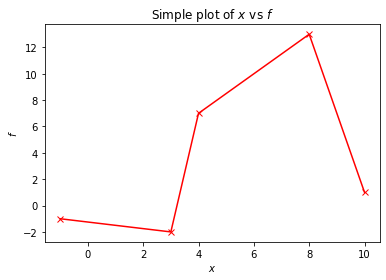

In [12]:
x = [-1, 3, 4, 8 , 10]
f = [-1, -2, 7, 13 , 1]

# Plot the graph with crosses(-x) and with red colour.
plt.plot(x,f,'-xr') # Use '-o' for circles

# Attach labels and title (using LaTeX syntax)
plt.xlabel('$x$')
plt.ylabel('$f$')
plt.title("Simple plot of $x$ vs $f$")

# Save plot to file (same directory as notebook)
plt.savefig("my-plot.pdf")
plt.show()

### Mathematical Functions

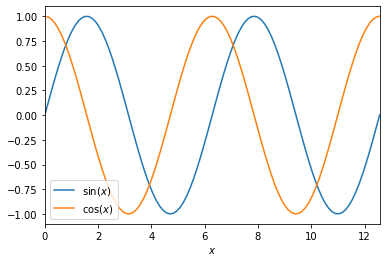

In [16]:
num_points = 100
x = np.linspace(0, 4*np.pi, num=num_points)

# Plot the graph
plt.plot(x, np.sin(x), label="$\sin(x)$")
plt.plot(x, np.cos(x), label="$\cos(x)$")

# Labels
plt.xlabel('$x$')

# Add legend
plt.legend()

# Set limits of x with start/end values *x[-1] is the last value in x
plt.xlim(x[0],x[-1])

plt.show()

### Bar Charts

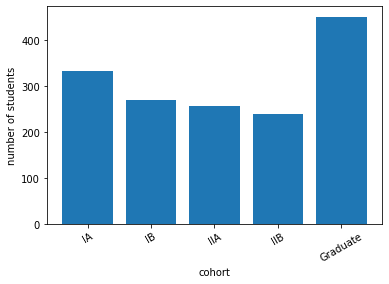

In [18]:
cohort = ('IA', 'IB', 'IIA', 'IIB', 'Graduate')
num_students = (332, 270, 256, 238, 451)

# Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
x_pos = np.arange(len(cohort))

# Produce bar plot
plt.bar(x_pos, num_students, align='center');

# Replace the x ticks with the Tripos name, and rotate labels 30 degrees
plt.xticks(x_pos, cohort, rotation=30)

# Add axis labels 
plt.xlabel('cohort')
plt.ylabel('number of students')

plt.show()

### Histograms

Bins:
 [-3.5349007  -3.19789946 -2.86089823 -2.52389699 -2.18689575 -1.84989452
 -1.51289328 -1.17589204 -0.8388908  -0.50188957 -0.16488833  0.17211291
  0.50911414  0.84611538  1.18311662  1.52011785  1.85711909  2.19412033
  2.53112156  2.8681228   3.20512404]
Frequency in each bin:
 [0.00178041 0.0059347  0.01068245 0.02136491 0.05044492 0.0997029
 0.16201721 0.23323357 0.31097809 0.37804016 0.40533976 0.37863363
 0.30623033 0.23382704 0.17091925 0.10267025 0.05459921 0.02670613
 0.01068245 0.00356082]
<a list of 20 Patch objects>


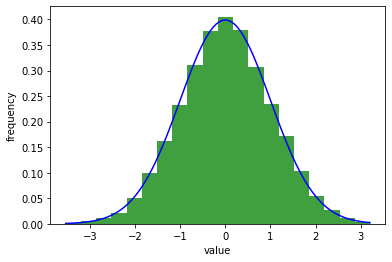

In [28]:
"Normal Gaussian Distribution - Histogram (random.normal) and Line Graph (normal)"

# Plot normed histogram of data: loc=mean, scale=stddev, size=num samples
x = np.random.normal(loc=0.0, scale=1.0, size=5000)  
# Produce histogram with 20 bins
n, bins, patches = plt.hist(x, 20, density=1.0, facecolor='green', alpha=0.75);

# n, bins and patches meaning:
print("Bins:\n",bins)
print("Frequency in each bin:\n",n)
print(patches)

# Line graph section:

# Import norm from SciPy stats module to compute norm probability distribution function
from scipy.stats import norm

# Create array of 100 equally spaces points, stating from the first value in the bins
# through to the last values in the bins
xf = np.linspace(bins[0], bins[-1], 100)

# Evaluate normal probability density function (pdf) at each xf
f = norm.pdf(xf)

# Create line plot of normal probability distribution function (blue line)
plt.plot(xf, f, 'b')


# Add labels
plt.xlabel('value')
plt.ylabel('frequency')

plt.show()

### Pie Charts

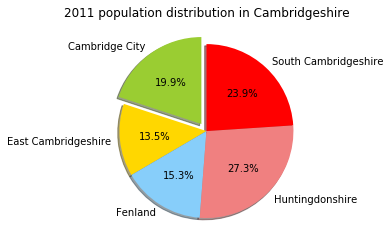

In [29]:
# Enter data into tuples
district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)

# Specify slice colours 
# (see http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

# "explode" the 1st slice (Cambridge City)
explode = (0.1, 0.0, 0, 0, 0)  

# Produce pie chart. The slices will be ordered and plotted counter-clockwise.
plt.pie(population, explode=explode, labels=district, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

# Add title
plt.title("2011 population distribution in Cambridgeshire")

plt.show()

### Interactive Plots

In [ ]:
"Importing ipywidgets module for interactive plots"
try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")

In [30]:
# Import interactive widgets module
from ipywidgets import interact

Plot: $f(t) = t^{\alpha} \sin(\omega t)$

In [32]:
# Encapsulate our plot code inside a function, with the plot parameters as arguments to the function
def plot(ω=1, α=0):
    t = np.linspace(0, 2*np.pi, 200)
    plt.xlabel('$t$')
    plt.ylabel('$f$')
    plt.title(r"$\alpha$ = {}, $\omega$ = {}".format(α, ω))
    plt.plot(t, (t**α)*np.sin(ω*t))
    plt.show()

# Plot the interactive plot; in tuple: (min, max, step)
interact(plot, ω=(-10, 10, 0.25), α=(0, 2, 0.25));

# Optional decorator we can put on top of the def plot() function
# Creates the interact(plot, ω, α) line
# @interact(ω =(-10, 10, 0.25), α=(0, 2, 0.25)) 

interactive(children=(FloatSlider(value=1.0, description='ω', max=10.0, min=-10.0, step=0.25), FloatSlider(val…

### Contour Plots

In [36]:
"Understanding np.meshgrid(x,y)"
x = np.linspace(-np.pi, np.pi, 5)
y = np.linspace(-np.pi, np.pi, 5)

X, Y = np.meshgrid(x, y)

print("X:\n", X)
print("\nY:\n", Y)

X:
 [[-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
 [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
 [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
 [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]
 [-3.14159265 -1.57079633  0.          1.57079633  3.14159265]]

Y:
 [[-3.14159265 -3.14159265 -3.14159265 -3.14159265 -3.14159265]
 [-1.57079633 -1.57079633 -1.57079633 -1.57079633 -1.57079633]
 [ 0.          0.          0.          0.          0.        ]
 [ 1.57079633  1.57079633  1.57079633  1.57079633  1.57079633]
 [ 3.14159265  3.14159265  3.14159265  3.14159265  3.14159265]]


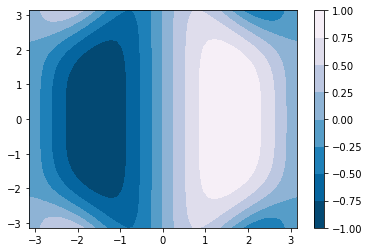

In [37]:
"Plot contour of f = sin(X)*cos((X*Y**2)/10)"
# Create points in the x, y direction
N = 50  # 50 points in each direction
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)

# Create a grid of (x,y) points (NxN array for both x and y)
X, Y = np.meshgrid(x, y)

# Evaulate function f at each point
f = np.sin(X)*np.cos((X*Y**2)/10)

# Create filled contour plot
plt.contourf(X, Y, f,  cmap=matplotlib.cm.PuBu_r) # cmap used a nice blue/white colour scheme
plt.colorbar()  # Add colour bar (legend)
plt.show()

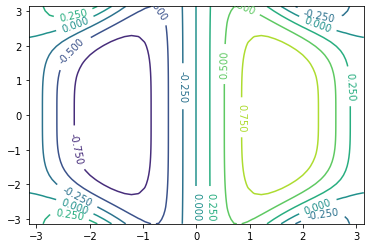

In [39]:
"Using the default skin with inline labels"
# Plot
p = plt.contour(X, Y, f)

# Add contour labels
plt.clabel(p, inline=1)

plt.show()

### 3D Plots

In [40]:
# Import 'extra modules'
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

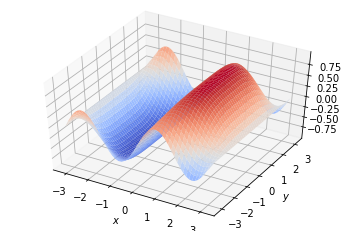

In [42]:
# The course content didn't explain it, but here's the example
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, f, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
                                              
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.view_init(elev=45)

plt.show()

# 09 Error handling and testing

Program errors include 2 types: syntax errors and exceptions.
This chapter addresses the exceptions part.

Objectives:
- Introduction to raising exceptions
- Use exception handling
- Creation of tests

### Rasing Exceptions
https://docs.python.org/3/library/exceptions.html

In [44]:
nominator = 1
denominator = 3
if denominator == 0:
    raise ValueError("The denominator must not equal to zero")
else:
    print(nominator/denominator)

# Use 'RuntimeError' if nothing fits the error

0.3333333333333333


### Exception Handling

In [27]:
def inputAndDivide():
    "Function that asks users for 2 integers. If input is invalid, user is prompted to try again"
    try:
        x = int(input("Type in the Nominator(Integer): "))
        y = int(input("Type in the Denominator(Integer): "))
    except:
        print("Invalid Integers entered. Please try again\n")
        return inputAndDivide()
    else:
        try:
            result = x / y
        except ZeroDivisionError:
            print("Division by zero! Please try again\n")
            return inputAndDivide()
        else:
            print("The result is: ", result)
    finally:
        None

inputAndDivide()

Type in the Nominator(Integer): 2
Type in the Denominator(Integer): 3
The result is:  0.6666666666666666


### Testing
For large projects, these tests might be run nightly or even every time a change is made to a program (the latter is known as continuous integration).

When testing a program, we should test for both valid and invalid input data. For the valid cases the computed result should be checked against a known correct solution. For the invalid data cases, tests should check that an exception is raised. We will consider the former, and address the latter in an optional section.

Ideally, tests for a large program should have different levels of granularity. Some tests should test small blocks (individual functions), ideally in isolation from other parts of a program. The cause of unexpected behaviour in a large program can then be pin-pointed quickly. Higher level tests should test a program as a whole, and would typically represent user cases.

In [2]:
def f(n): 
    "Compute the nth Fibonacci number using recursion"
    # YOUR CODE HERE
    if n < 0:
        raise ValueError("The Fibonacci is not valid for n < 0")
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return f(n-2) + f(n-1)

In [3]:
# Assert to test for correctness
assert f(0) == 0
assert f(1) == 1
assert f(2) == 1
assert f(3) == 2
assert f(10) == 55
assert f(15) == 610

# Use pytest to test for error raised
# Check that ValueError is raised for n < 0
import pytest
with pytest.raises(ValueError):
    f(-1)
with pytest.raises(ValueError):
    f(-2)

# 10 Algorithms

Objectives:
- Develop appreciation of what an algorithm is
- Learn to create an algorithm to solve a problem
- Use *pseudocode* to describe algorithms

- Pseudocode is commonly used to express algorithms. It involves presenting an algorithm in a way that resembles a high-level programming language, like Python.

### Search

In [2]:
x = [1,2,3,4,5]
print(2 in x)
print(2.5 in x)
print(6 in x)

True
False
False


### Linear Search

In [5]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

my_colours = ["yellow", "green", "blue", "orange", "purple"]
print(linear_search(my_colours, "blue"))
print(linear_search(my_colours, "black"))

True
False


### Binary Search

In [6]:
def binary_search(x, y):
    "Peform binary search on x to find y. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If value is outside of interval, return None 
    if y < x[lower] or y > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] y lies, and update midpoint accordingly
        if y < x[midpoint]:
            upper = midpoint - 1
        elif y > x[midpoint]:
            lower = midpoint + 1
        elif y == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

In [9]:
import numpy as np

# Generate an array of integers and sort
x = np.array([1,  -15, -12,  -8,  -7,  -6,  -4 ,  2,   8,   9,  15,  15,  -19, 18,  22])
x.sort()
print(x)

# Test for values we know are in the array
assert binary_search(x, x[2]) == 2
# Test for values we know are outside the array interval
assert binary_search(x, -21) == None 
assert binary_search(x, 38) == None 
# Test for values we know are not in the array but are inside the array interval
assert binary_search(x, -11) == None
assert binary_search(x, 21) == None

[-19 -15 -12  -8  -7  -6  -4   1   2   8   9  15  15  18  22]


### Bubble Sort

In [10]:
def bubble_sort(A):
    "Sort A and return"

    # Make a copy of A    
    A = A.copy()

    # Perform sorting    
    N = len(A)
    while N > 0:
        for i in range(N - 1):
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[ i + 1]
            # Enable the below print statement to see how the algorithms progresses
            # print("   N={}, i={}, A={}".format(N, i, A))
        N = N - 1
        
    return A

### Quicksort

In [12]:
import numpy as np
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        A = A.copy()
        hi = len(A) - 1

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

### Sort performance

In [14]:
data = np.random.rand(5000)
%time x = bubble_sort(data)
%time x = quicksort(data)
%time x = np.sort(data, kind='quicksort')

Wall time: 6.05 s
Wall time: 28 ms
Wall time: 0 ns


### [Photo Blurring Exercise](Exercises/10%20Exercises.ipynb)

# 11 Complexity
Objectives:
- Understand 'big-oh' ($O$) notation
- Appreciate the consequences of algorithmic complexity
- Determine the complexity of some simple algorithms
- Measure complexity experimentally

Consider a problem of size $n$ (if we were sorting an array of numbers, $n$ would be the length of the array).
For many algorithms, when $n$ is large we can express the time cost $t$ as:

$$
t = C g(n)
$$

where $C$ is a constant and $g$ is a function. If the cost can be expressed as above, where $C$ is a constant, then we write in 'big-Oh' notation:

$$
t = O(g(n))
$$

Common Expressions for $g(n)$ are as follows:
- Constant complexity: $O(1)$ (e.g. we assume the cost of operations as constants)
- Polynomial complexity: $O(n^k)$ (where $k\ge1$, doesn't have to be an integer)
- Linear complexity: $O(n)$
- Quadratic complexity: $O(n^2)$
- Cubic complexity: $O(n^3)$
- Logarithmic complexity: $O(\log(n))$
- Loglinear complexity: $O(n\log(n))$ (e.g. Fast Fourier Transform FFT)
- Exponential complexity: $O(c^n)$ (where $c\ge1$; usually too expensive to use)

In [17]:
m = 500
n = 1000
A = np.random.rand(m, n)

for i in range(m): # O(m)
    for j in range(n): # O(n)
        A[i, j] = 10*A[i, j] # O(1)
        
# OVERALL: O(m*n)

### Linear Search:
- Best case: $O(1)$ (first item)
- Worst case: $O(n)$ (last item)
- Average case: $O(n)$ (it's more like $O(n/2)$, but we don't care about the $1/2$ constant)

In [18]:
def linear_search(x, val):
    "Return True if val is in x, otherwise return False"
    for item in x:
        if item == val:
            return True
    return False

In [19]:
# Create array of problem sizes n we want to test (powers of 2)
N = 2**np.arange(2, 20)

# Generate the array of integers for the largest problem to use in plotting times
x = np.arange(N[-1])

# Initialise an empty array to stores times for plotting
times = []

# Time the search for each problem size
for n in N:

    # Time search function (repeating 3 times) to find a random integer in x[:n]
    t = %timeit -q -n4 -r1 -o linear_search(x[:n], np.random.randint(0, n))

    # Store best case time
    times.append(t.best)

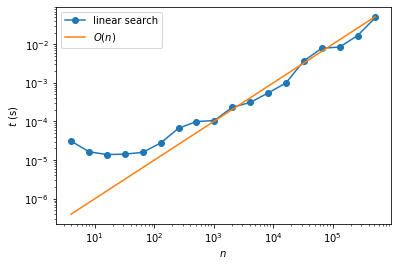

In [21]:
import matplotlib.pyplot as plt

# Plot and label the time taken for linear search
plt.loglog(N, times, marker='o', label='linear search')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')

# Show a reference line of O(n)
"CHANGED 1e-6 to 1e-7"
plt.loglog(N, 1e-7*N, label='$O(n)$')

# Add legend
plt.legend(loc=0)

plt.show()

### Binary Search:
- Best case: $O(1)$ (item not in list)
- Worst case: $O(\log n)$
- Average case: $O(\log n)$

In [24]:
def binary_search(x, val):
    "Peform binary search on x to find val. If found returns position, otherwise returns None."

    # Intialise end point indices
    lower, upper = 0, len(x) - 1

    # If values is outside of interval, return None 
    if val < x[lower] or val > x[upper]:
        return None

    # Perform binary search
    while True:
                
        # Compute midpoint index (integer division)
        midpoint = (upper + lower)//2

        # Check which side of x[midpoint] val lies, and update midpoint accordingly
        if val < x[midpoint]:
            upper = midpoint - 1
        elif val > x[midpoint]:
            lower = midpoint + 1
        elif val == x[midpoint]:  # found, so return
            return midpoint
       
        # In this case val is not in list (return None)
        if upper < lower:
            return None

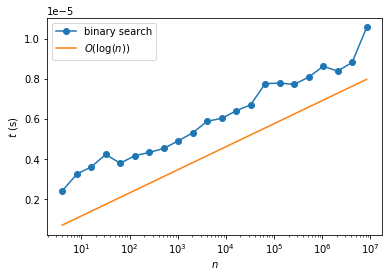

In [40]:
# I will delete the comments because the process as the plot process is same as above for linear search
import numpy as np

N = 2**np.arange(2, 24)
x = np.arange(N[-1])
x = np.sort(x)
times = []
for n in N:
    t = %timeit -q -n5 -r2 -o binary_search(x[:n], 2)
    times.append(t.best)

plt.semilogx(N, times, marker='o', label='binary search')
plt.semilogx(N, 5e-7*np.log(N), label = '$O(\log(n))$')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0);
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

### Bubble Sort

Complexity: $O(n^{2})$

In [41]:
def bubble_sort(A):
    "Sort A and return"
    A = A.copy()
    n = len(A)
    while n > 0: # O(n)
        for i in range(n - 1): #O(n)
            # Swap data if in wrong order
            if A[i] > A[i + 1]:
                A[i + 1], A[i] = A[i], A[i + 1] # O(1)
        n = n - 1
    return A

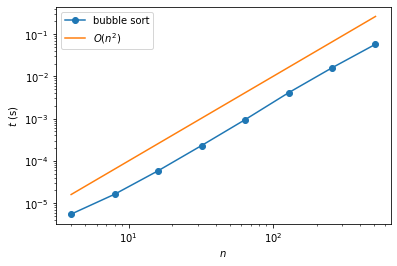

In [42]:
N = 2**np.arange(2, 10)
x = np.random.rand(N[-1])
times = []
for n in N:
    t = %timeit -q -n2 -r2 -o bubble_sort(x[:n])
    times.append(t.best)

plt.loglog(N, times, marker='o', label='bubble sort')
plt.loglog(N, 1e-6*N**2, label='$O(n^2)$')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)
plt.show()

### Quicksort

- Best case: $O(n\log n)$
- Worst case: $O(n^{2})$ (already sorted data)
- Average case: $O(n\log n)$

In [43]:
def quicksort(A, lo=0, hi=None):
    "Sort A and return sorted array"

    # Initialise data the first time function is called    
    if hi is None:
        hi = len(A) - 1
        A = A.copy()

    # Sort    
    if lo < hi:
        p = partition(A, lo,  hi)
        quicksort(A, lo, p - 1)
        quicksort(A, p + 1, hi)
    return A


def partition(A, lo, hi):
    "Partitioning function for use in quicksort"
    pivot = A[hi]
    i = lo
    for j in range(lo,  hi):
        if A[j] <= pivot:
            A[i], A[j] = A[j], A[i]
            i += 1
    A[i], A[hi] = A[hi], A[i]
    return i

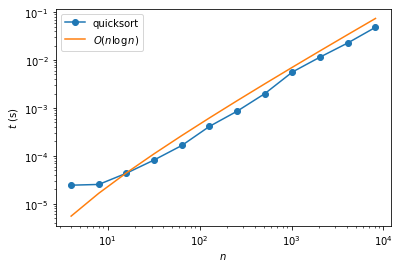

In [44]:
N = 2**np.arange(2, 14)
x = np.random.rand(N[-1])
times = []
for n in N:
    t = %timeit -n1 -r1 -o -q quicksort(x[:n])
    times.append(t.best)

plt.loglog(N, times, marker='o', label='quicksort')
plt.loglog(N, 1e-6*N*np.log(N), label='$O(n\log\, n)$')
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)
plt.show()

See worst case complexity in [11 Complexity](11%20Complexity.ipynb)

### Library sort implementations
They are like 100 times faster than our implementation <br>
numpy's quicksort  `np.sort(x[:n], kind='quicksort')` also avoids the worst case scenario pretty well (sorted list)

My implementations, tests, and complexity graphs for dot product of vectors, matrix-vector multiplication, and matrix-matrix multiplication are in [Exercise 11](11%20Exercises.ipynb).You can see how much slower my implementations are compared to numpy.dot(self, other).

Also see my graph for determining the complexity of numpy's determinant, and turns out numpy uses the fast matrix multiplication, which has an interesting complexity of $O(n^{2.373})$.

# 12 Object-oriented design

Objectives:
- Appreciate objects as instantiations of classes
- Understanding of attributes and methods of classes
- Learn to create simple classes
- Implement and use class methods

### Understanding Classes

In [48]:
"numpy.ndarray class:"
A = np.array([[1, -4, 7], [2, 6, -1]])
print(type(A))

"Attributes: A.attr"
print(A.shape)
print(A.size)
print(A.ndim)

"Methods: A.method()"
print(A.min())
A.sort(kind='quicksort') # Taking arguments
print(A)

x = np.ones(A.shape[1]) # Taking other objects as arguments
print(x)
b = A.dot(x)
print(b)

<class 'numpy.ndarray'>
(2, 3)
6
2
-4
[[-4  1  7]
 [-1  2  6]]
[1. 1. 1.]
[4. 7.]


### Creating Classes

In [49]:
class PersonName:
    def __init__(self, surname, forename):
        self.surname = surname  # Attribute
        self.forename = forename  # Attribute
        
    # This is a method
    def full_name(self):
        "Return full name (forename surname)"
        return self.forename + " " + self.surname

    # This is a method
    def surname_forename(self, sep=","):
        "Return 'surname, forename', with option to specify separator"
        return self.surname + sep + " " + self.forename

In [51]:
# Instantiate an object
name_entry = PersonName("Bloggs", "Joanna")
print(type(name_entry))

<class '__main__.PersonName'>


In [52]:
# Attributes
print(name_entry.surname)
print(name_entry.forename)

Bloggs
Joanna


In [53]:
# Methods
print(name_entry.full_name())
print(name_entry.surname_forename())
print(name_entry.surname_forename(";"))

Joanna Bloggs
Bloggs, Joanna
Bloggs; Joanna


### Mathematical Examples

In [71]:
class MyNumber:

    def __init__(self, x):
        self.x = x  # Store value (attribute)
        
    # Custom '<' operator (method)
    def __lt__(self, other):
        if self.x % 2 == 0 and other.x % 2 != 0:  # I am even, other is odd, so I am less than                   
            return True
        elif self.x % 2 != 0 and other.x % 2 == 0:  # I am odd, other is even, so I am not less than 
            return False
        else:
            return self.x < other.x  # Use usual ordering of numbers

    # Custom '==' operator (method)
    def __eq__(self, other):
        return self.x == other.x

    # Custom '>' operator (method)
    def __gt__(self, other):
        if self.x % 2 == 0 and other.x % 2 != 0:  # I am even, other is odd, so I am not greater                    
            return False
        elif self.x % 2 != 0 and other.x % 2 == 0:  # I am odd, other is even, so I am greater                    
            return True
        else:
            return self.x > other.x  # Use usual ordering of numbers

    # This function is called by Python when we try to print something   
    def __repr__(self):
        return str(self.x)

In [75]:
x = MyNumber(4)
y = MyNumber(3)
print(x < y)     # Expect True (since x is even and y is odd)
print(y < x)     # Expect False
print(x == y)    # Expect False, not an error
print(x,', ', y) # Expect 4,3 not two of this: <__main__.MyNumber object at 0x0000015BEA751E08>

True
False
False
4 ,  3


In [78]:
x = np.random.randint(0, 200, 10)
y = [MyNumber(v) for v in x]

# Use the built-in list sort method to sort the list of 'MyNumber' objects
y.sort()
print(y) # Expect even numbers first

[0, 58, 96, 98, 144, 166, 45, 49, 61, 137]


In [80]:
class MyVector:
    """A vector object that can return its size and norm, and can compute the dot product 
    with another vector  """

    def __init__(self, x): # Initialize self
        self.x = x # Add an attribute called x

    # Return length of vector
    def size(self):
        return len(self.x)
    
    # This allows access by index, e.g. y[2]
    def __getitem__(self, index):
        return self.x[index]
    
    # Calculate the norm
    def norm(self):
        n = 0
        for i in range(self.size()):
            n += self[i]**2
        return n**0.5
    
    # Calculate the dot product
    def dot(self, other):
        d = 0
        for i in range(self.size()):
            d += self[i] * other[i]
        return d
    
    # For printing the list, not sth like <__main__.MyVector object at 0x0000015BEA7C1808>
    def __repr__(self):
        return(str(self.x))

In [81]:
u = MyVector([1, 1, 2])
v = MyVector([2, 1, 1])

print(u.size())

print(u.__getitem__(0))
print(u[0])

print(u.norm())
print(u)

3
1
1
2.449489742783178
[1, 1, 2]


and... that's all for the Michalemas Computing Course!
$$
{\Huge \it end}
$$

# Appendix

Here I will list all the markdown formatting that I may use in the notebook

> Update: after finishing this whole thing I only just realized there is a 'Using Notebooks' notebook
> that details everything I've written below <br>
> Link to the file: [Using notebooks](Using%20notebooks.ipynb)

<br>


## Subheaders
### Subsubheader
#### I don't even know whether I'll use this header

<br><br>A lot of breaks with `<br>`
<br> 

*Italic* keywords
> Highlights or key ideas with a nice little indent over here

Some Hyperlinks, like this one: [00 Introduction](00%20Part%20IA%20Michaelmas%20Term%20computing.ipynb)
 <br><br>

- Bullet points


1. Lists, and its interesting how you only need to type 1. for all of them
1. and also separate 2 normal lines between bullet points and enumerated lists

<br>


`Some code` within sentences, or

```python
print("Some Python Code (that is just for show)")
```

<br>


Some $\LaTeX \; \textit{equations} \; or \; \textbf{variables}$ within text, or
$$
\int \; \LaTeX \; \textit{Equation}x \; dx
$$



More $\LaTeX$ code

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}